# Housing Market
--- 
### Introduction
Heterogeneous is a key word to describe the housing market nowadays. Houses can have a vast variety of characteristics to set them apart and give them that personal touch. This wide variety of elements becomes a problem when you are trying to assess home values. How can you accurately determine the fair price of a property when it has such a unique set of characteristics.

### Data acquisition
To tackle this problem and find a model that can accurately predict the selling price of homes I will analyze and compare explanatory variables describing different aspects and characteristics of residential property in Ames, Iowa from 2006 to 2010. 
There are 2930 observations in the dataset with 79 variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) such as land slope, lot shape, the general zoning classification of the sale, linear feet of street connected to property and many more.
This dataset was compiled by Dean De Cock
(http://jse.amstat.org/v19n3/decock.pdf).

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

train_data = pd.read_csv('C:\\Users\\52551\\Documents\\notas-vs\\final\\datos\\train.csv')
test_data = pd.read_csv('C:\\Users\\52551\\Documents\\notas-vs\\final\\datos\\test.csv')

print(train_data.head())
print('Train data shape: '+str(np.shape(train_data)))
print('----------------------------------------------------------------')
print(test_data.head())
print('Test data shape: '+str(np.shape(test_data)))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

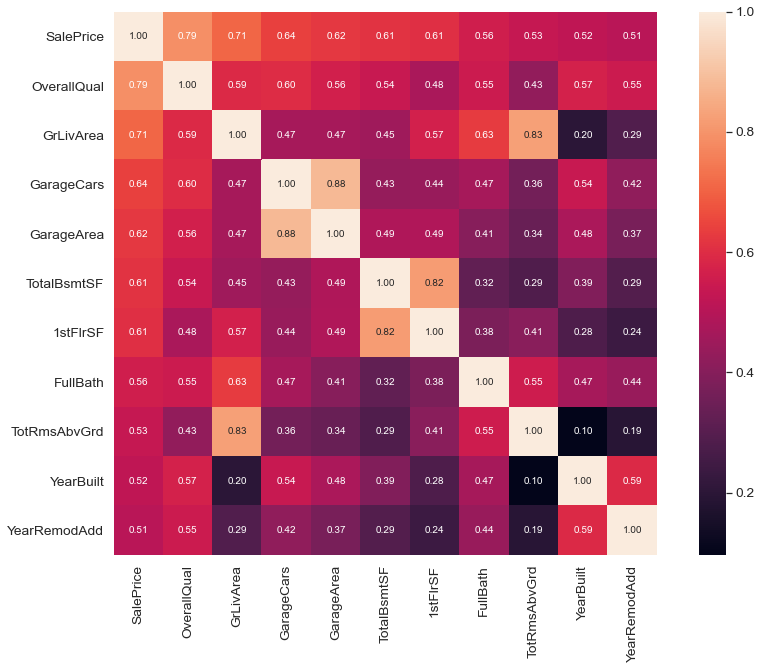

In [2]:
#saleprice correlation matrix
k = 11 #number of variables for heatmap
corrmat = train_data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [3]:
train_data.drop(['GarageArea','TotalBsmtSF','TotRmsAbvGrd','1stFlrSF','GarageYrBlt','MasVnrArea'],axis=1,inplace=True)
print('Train data shape: '+str(np.shape(train_data)))

Train data shape: (1460, 75)


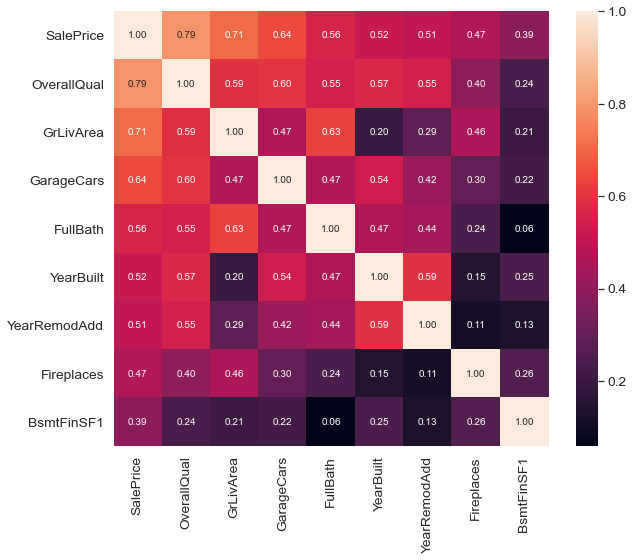

In [4]:
#saleprice correlation matrix
k = 9 #number of variables for heatmap
corrmat = train_data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

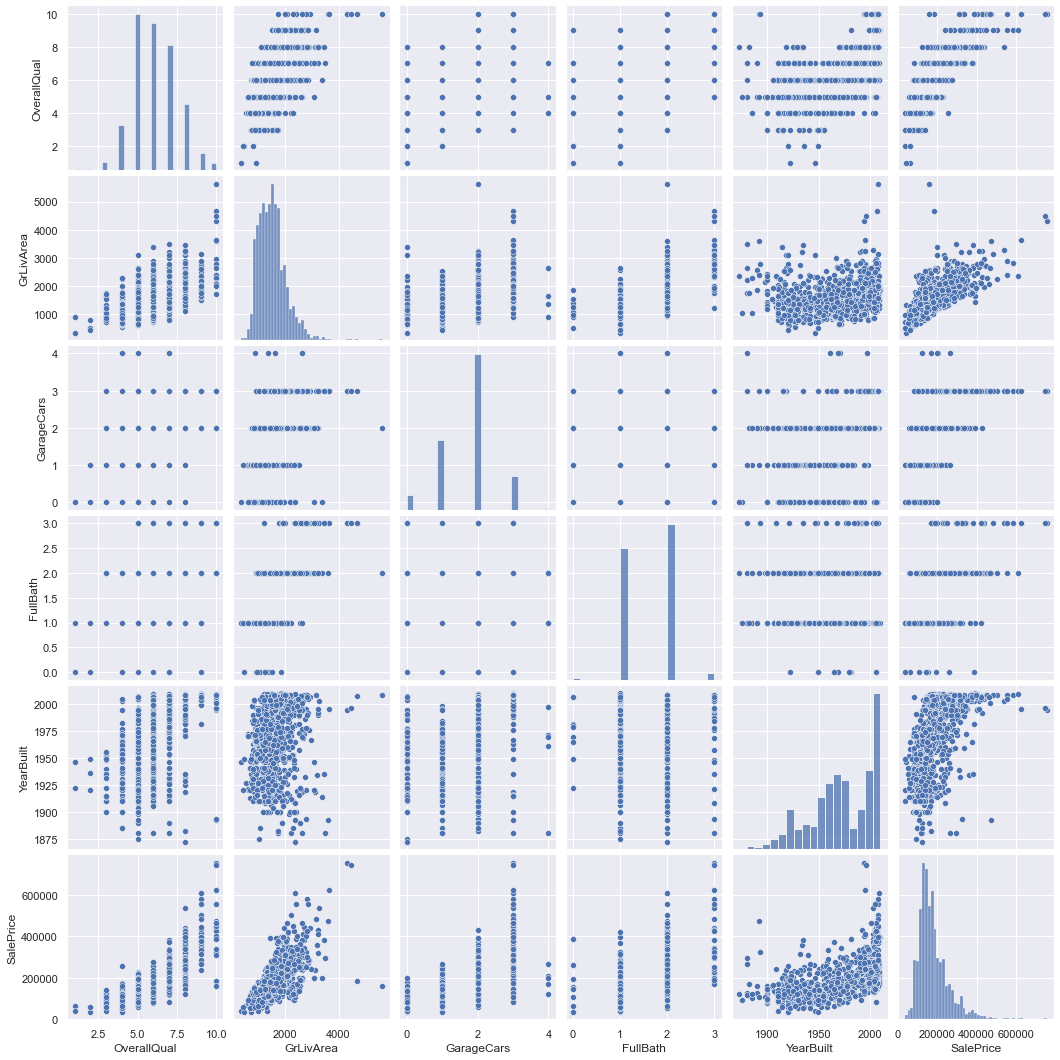

In [6]:
#scatterplot
sns.set()
cols = ['OverallQual','GrLivArea','GarageCars','FullBath','YearBuilt','SalePrice']
sns.pairplot(train_data[cols], size = 2.5)
plt.show()

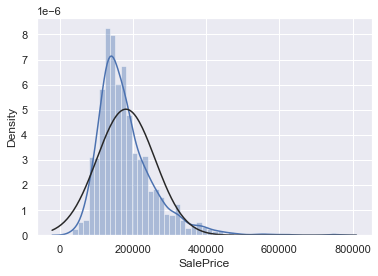

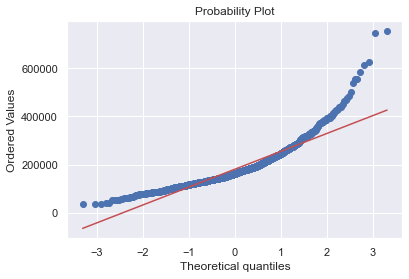

In [11]:
#SalePrice Histogram and normal probability plot
sns.distplot(train_data['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

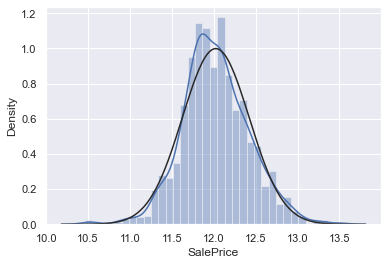

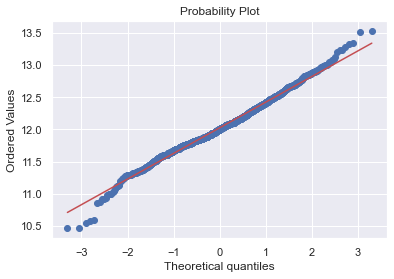

In [12]:
# Adjusting 'SalePrice' for a Normal distribution
train_data['SalePrice'] = np.log(train_data['SalePrice'])

sns.distplot(train_data['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

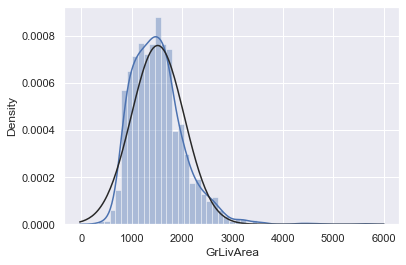

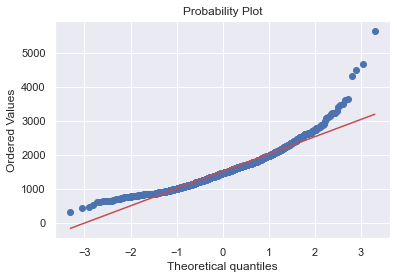

In [13]:
#GrLivArea Histogram and normal probability plot
sns.distplot(train_data['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

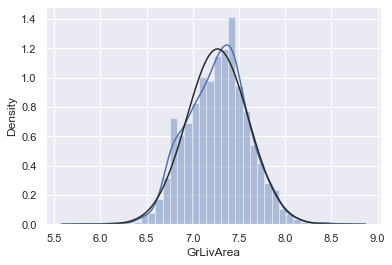

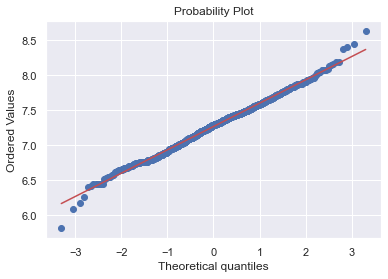

In [14]:
# Adjusting 'GrLivArea' for a Normal distribution
train_data['GrLivArea'] = np.log(train_data['GrLivArea'])

sns.distplot(train_data['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

In [16]:
#Split Data
x_train, x_test, y_train, y_test = train_test_split(train_data[['OverallQual','GrLivArea','GarageCars','FullBath','YearBuilt']],train_data['SalePrice'],test_size=.3,random_state=0)


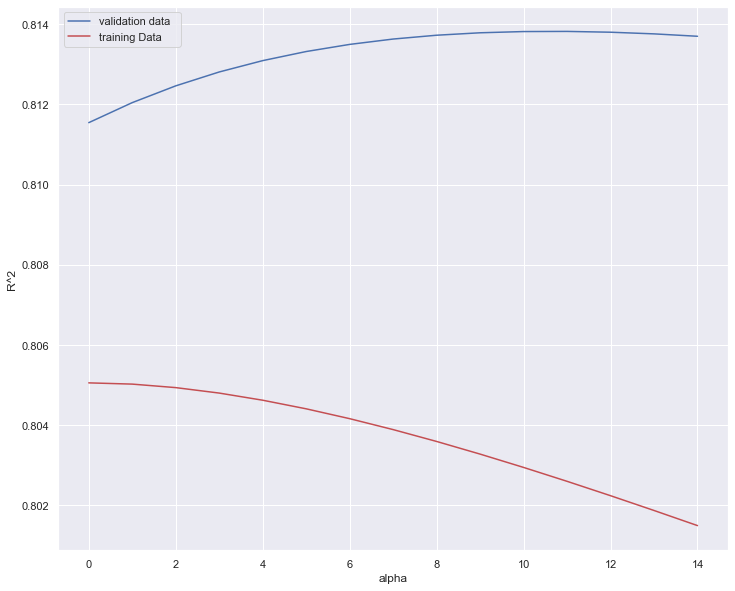

In [17]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = np.array(range(0,15))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train, y_train)
    Rsqu_test.append(RigeModel.score(x_test, y_test))
    Rsqu_train.append(RigeModel.score(x_train, y_train))

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [18]:
parameters1= [{'alpha': [0.001,.01,0.1,1, 10, 100, 1000]}]
Grid1 = GridSearchCV(RigeModel, parameters1,cv=4)
Grid1.fit(x_train,y_train)
BestRR=Grid1.best_estimator_

Ridgelm = Ridge(alpha=0.1) 
Ridgelm.fit(x_train, y_train)
YhatRid = Ridgelm.predict(x_test)

print('BestRR = '+str(BestRR))

print('Ridge R^2 = '+str(Ridgelm.score(x_test,y_test)))
print('Ridge RMSE = '+str(mean_squared_error(y_test ,YhatRid,squared=False)))
print('Range = '+str(y_test.max()-y_test.min()))

BestRR = Ridge(alpha=1)
Ridge R^2 = 0.8115985715339622
Ridge RMSE = 0.17061687644069926
Range = 2.652571048781981


In [19]:
#Linear Regression
lm = LinearRegression()
lm.fit(x_train,y_train)
Yhat=lm.predict(x_test)

# Metrics
print('MLR R^2 = '+str(lm.score(x_test,y_test)))
print('MLR RMSE = '+str(mean_squared_error(y_test ,Yhat,squared=False)))
print('Range = '+str(y_test.max()-y_test.min()))

MLR R^2 = 0.8115446401767943
MLR RMSE = 0.1706412948895512
Range = 2.652571048781981


In [20]:
# Test Data Cleaning
test_data['GrLivArea'] = np.log(test_data['GrLivArea'])
x_test_sub = test_data[['OverallQual','GrLivArea','GarageCars','FullBath','YearBuilt']]
print(x_test_sub.isnull().sum())

x_test_sub['GarageCars'].fillna(x_test_sub['GarageCars'].mean(),inplace=True)
print('----Clean Data------')
print(x_test_sub.isnull().sum())

OverallQual    0
GrLivArea      0
GarageCars     1
FullBath       0
YearBuilt      0
dtype: int64
----Clean Data------
OverallQual    0
GrLivArea      0
GarageCars     0
FullBath       0
YearBuilt      0
dtype: int64


In [21]:
# Submission

prediction = lm.predict(x_test_sub)
Housing_results = pd.DataFrame(prediction)
Housing_results.columns=['SalePrice']
Housing_results['SalePrice'] = np.exp(Housing_results['SalePrice'])
print(Housing_results.head())
Housing_results.to_csv(path_or_buf='C:\\Users\\52551\\Documents\\notas-vs\\final\\datos\\Housing_results.csv')


       SalePrice
0  108047.697615
1  145453.067162
2  170401.173192
3  188858.573263
4  205756.463761
